  # Flood Area Semantic Segmentation Using a Custom CNN Architecture from Scratch for Climate Resilience
  # Raw Code - Member :
  - Muhammad Yusuf Andrika (22.11.4901)
  - Abdul Majid Ridwan Tyastonoatmaja (22.11.4905)
  - Muhammad Alfi Hidayat (22.11.4910)

## Section 1: Imports Libraries

In [34]:
pip install albumentations --quiet

This command silently installs the `albumentations` library using `pip`. `albumentations` is a fast and flexible image augmentation library. The `--quiet` flag suppresses the output during the installation process.

In [35]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, optimizers, losses
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import Sequence
import tensorflow as tf
import kagglehub
from PIL import Image
import albumentations as A
import random
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Lambda, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, concatenate, BatchNormalization, Activation
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import backend as K

This section imports all the necessary Python libraries for the project. These libraries cover various functionalities including data manipulation (pandas, numpy), image processing (cv2, PIL, matplotlib, albumentations), machine learning model building (tensorflow.keras), data splitting (sklearn), and file handling (os, kagglehub).

### This section imports all the necessary Python libraries required for the project. Key libraries include `numpy` and `pandas` for data manipulation, `cv2`, `PIL`, `matplotlib`, and `albumentations` for image processing and augmentation, `tensorflow.keras` for building and training the deep learning model, and `sklearn` for splitting data. Additionally, libraries for file handling (`os`), dataset access (`kagglehub`), and other utilities (`random`) are imported. The `albumentations` library is specifically installed quietly using `pip`.

## Section 2: Data loading

### Path

In [36]:
# Download latest version
path = kagglehub.dataset_download("fitcompetition/test-preliminary-round-fit-2025")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/test-preliminary-round-fit-2025



The code downloads a dataset named "test-preliminary-round-fit-2025" from Kaggle Hub and prints the path to the downloaded files.

### Check Dataset Folder Structure

In [37]:
!ls {path}

Image  Tabular


List contents of the specified directory path.

In [38]:
!ls {path}/Image

EuroSAT  FloodAreaSegmentation	PlantVillage


The command lists the files and directories within the 'Image' folder located at the specified 'path'.

In [39]:
!ls {path}/Image/FloodAreaSegmentation/

Image  Mask  metadata.csv


list contents of the FloodAreaSegmentation folder

In [40]:
!ls {path}/Image/FloodAreaSegmentation/Mask

0.png	  1036.png  1073.png  2012.png	2049.png  3021.png  3058.png  3095.png
1000.png  1037.png  1074.png  2013.png	2050.png  3022.png  3059.png  3096.png
1001.png  1038.png  1075.png  2014.png	2051.png  3023.png  3060.png  3097.png
1002.png  1039.png  1076.png  2015.png	2052.png  3024.png  3061.png  3098.png
1003.png  1040.png  1077.png  2016.png	2053.png  3025.png  3062.png  30.png
1004.png  1041.png  1078.png  2017.png	20.png	  3026.png  3063.png  31.png
1005.png  1042.png  1079.png  2018.png	21.png	  3027.png  3064.png  32.png
1006.png  1043.png  1080.png  2019.png	22.png	  3028.png  3065.png  33.png
1007.png  1044.png  1081.png  2020.png	23.png	  3029.png  3066.png  34.png
1008.png  1045.png  1082.png  2021.png	24.png	  3030.png  3067.png  35.png
1009.png  1046.png  1083.png  2022.png	25.png	  3031.png  3068.png  36.png
1010.png  1047.png  1084.png  2023.png	26.png	  3032.png  3069.png  37.png
1011.png  1048.png  1085.png  2024.png	27.png	  3033.png  3070.png  38.png
1012.png  1049

list content of the Mask Folder

In [41]:
!ls {path}/Image/FloodAreaSegmentation/Image

0.jpg	  1036.jpg  1073.jpg  2012.jpg	2049.jpg  3021.jpg  3058.jpg  3095.jpg
1000.jpg  1037.jpg  1074.jpg  2013.jpg	2050.jpg  3022.jpg  3059.jpg  3096.jpg
1001.jpg  1038.jpg  1075.jpg  2014.jpg	2051.jpg  3023.jpg  3060.jpg  3097.jpg
1002.jpg  1039.jpg  1076.jpg  2015.jpg	2052.jpg  3024.jpg  3061.jpg  3098.jpg
1003.jpg  1040.jpg  1077.jpg  2016.jpg	2053.jpg  3025.jpg  3062.jpg  30.jpg
1004.jpg  1041.jpg  1078.jpg  2017.jpg	20.jpg	  3026.jpg  3063.jpg  31.jpg
1005.jpg  1042.jpg  1079.jpg  2018.jpg	21.jpg	  3027.jpg  3064.jpg  32.jpg
1006.jpg  1043.jpg  1080.jpg  2019.jpg	22.jpg	  3028.jpg  3065.jpg  33.jpg
1007.jpg  1044.jpg  1081.jpg  2020.jpg	23.jpg	  3029.jpg  3066.jpg  34.jpg
1008.jpg  1045.jpg  1082.jpg  2021.jpg	24.jpg	  3030.jpg  3067.jpg  35.jpg
1009.jpg  1046.jpg  1083.jpg  2022.jpg	25.jpg	  3031.jpg  3068.jpg  36.jpg
1010.jpg  1047.jpg  1084.jpg  2023.jpg	26.jpg	  3032.jpg  3069.jpg  37.jpg
1011.jpg  1048.jpg  1085.jpg  2024.jpg	27.jpg	  3033.jpg  3070.jpg  38.jpg
1012.jpg  1049

List content of the Image folder

### Read Metadata

In [42]:
metadata_df = pd.read_csv(f"{path}/Image/FloodAreaSegmentation/metadata.csv")
metadata_df.head()

Image   Mask
0  0.jpg  0.png
1  1.jpg  1.png
2  2.jpg  2.png
3  3.jpg  3.png
4  4.jpg  4.png

Loading the metadata.csv

### This section focuses on loading the dataset required for the project. It involves the following steps:

1.  **Downloading the Dataset:** The code uses `kagglehub.dataset_download` to download the "test-preliminary-round-fit-2025" dataset from Kaggle Hub. The path to the downloaded files is then printed.

2.  **Checking Folder Structure:** Several `!ls` commands are used to inspect the structure of the downloaded dataset, specifically looking into the `Image`, `FloodAreaSegmentation`, `Mask`, and `Image` subfolders to understand the organization of the data.

3.  **Reading Metadata:** The `metadata.csv` file, located within the `FloodAreaSegmentation` folder, is loaded into a pandas DataFrame named `metadata_df`. The first few rows of the DataFrame are then displayed using `metadata_df.head()` to provide a glimpse of the dataset's metadata.

In essence, this section prepares the data for subsequent processing and model building by downloading, inspecting, and loading the relevant dataset and its associated metadata.

## Section 3 : Exploratory Data Analysis (EDA) + Preprocessing

### EDA

#### Number of images

We will now determine the total number of images available in our dataset by counting the rows in the metadata DataFrame, as each row corresponds to a single image.

In [43]:
jumlah_gambar = len(metadata_df)
print(f"The Number of Images in dataset: {jumlah_gambar}")

The Number of Images in dataset: 290


#### Unique pixel values (sanity check mask 0/255)

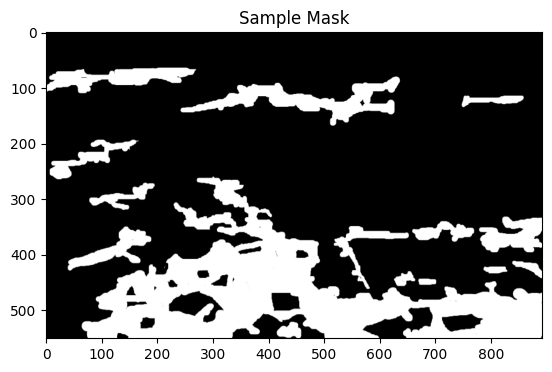

Unique pixel values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 2

In [44]:
# pick random mask
mask = np.array(Image.open(f"{path}/Image/FloodAreaSegmentation/Mask/0.png"))

# show mask visually
plt.imshow(mask, cmap="gray")
plt.title("Sample Mask")
plt.show()

# confirm unique pixel values
print("Unique pixel values:", np.unique(mask))

The mask pixel values range from 0 to 255. Therefore, scaling to 0/1 is necessary to ensure compatibility with binary semantic segmentation.

#### 10 pairs image + mask

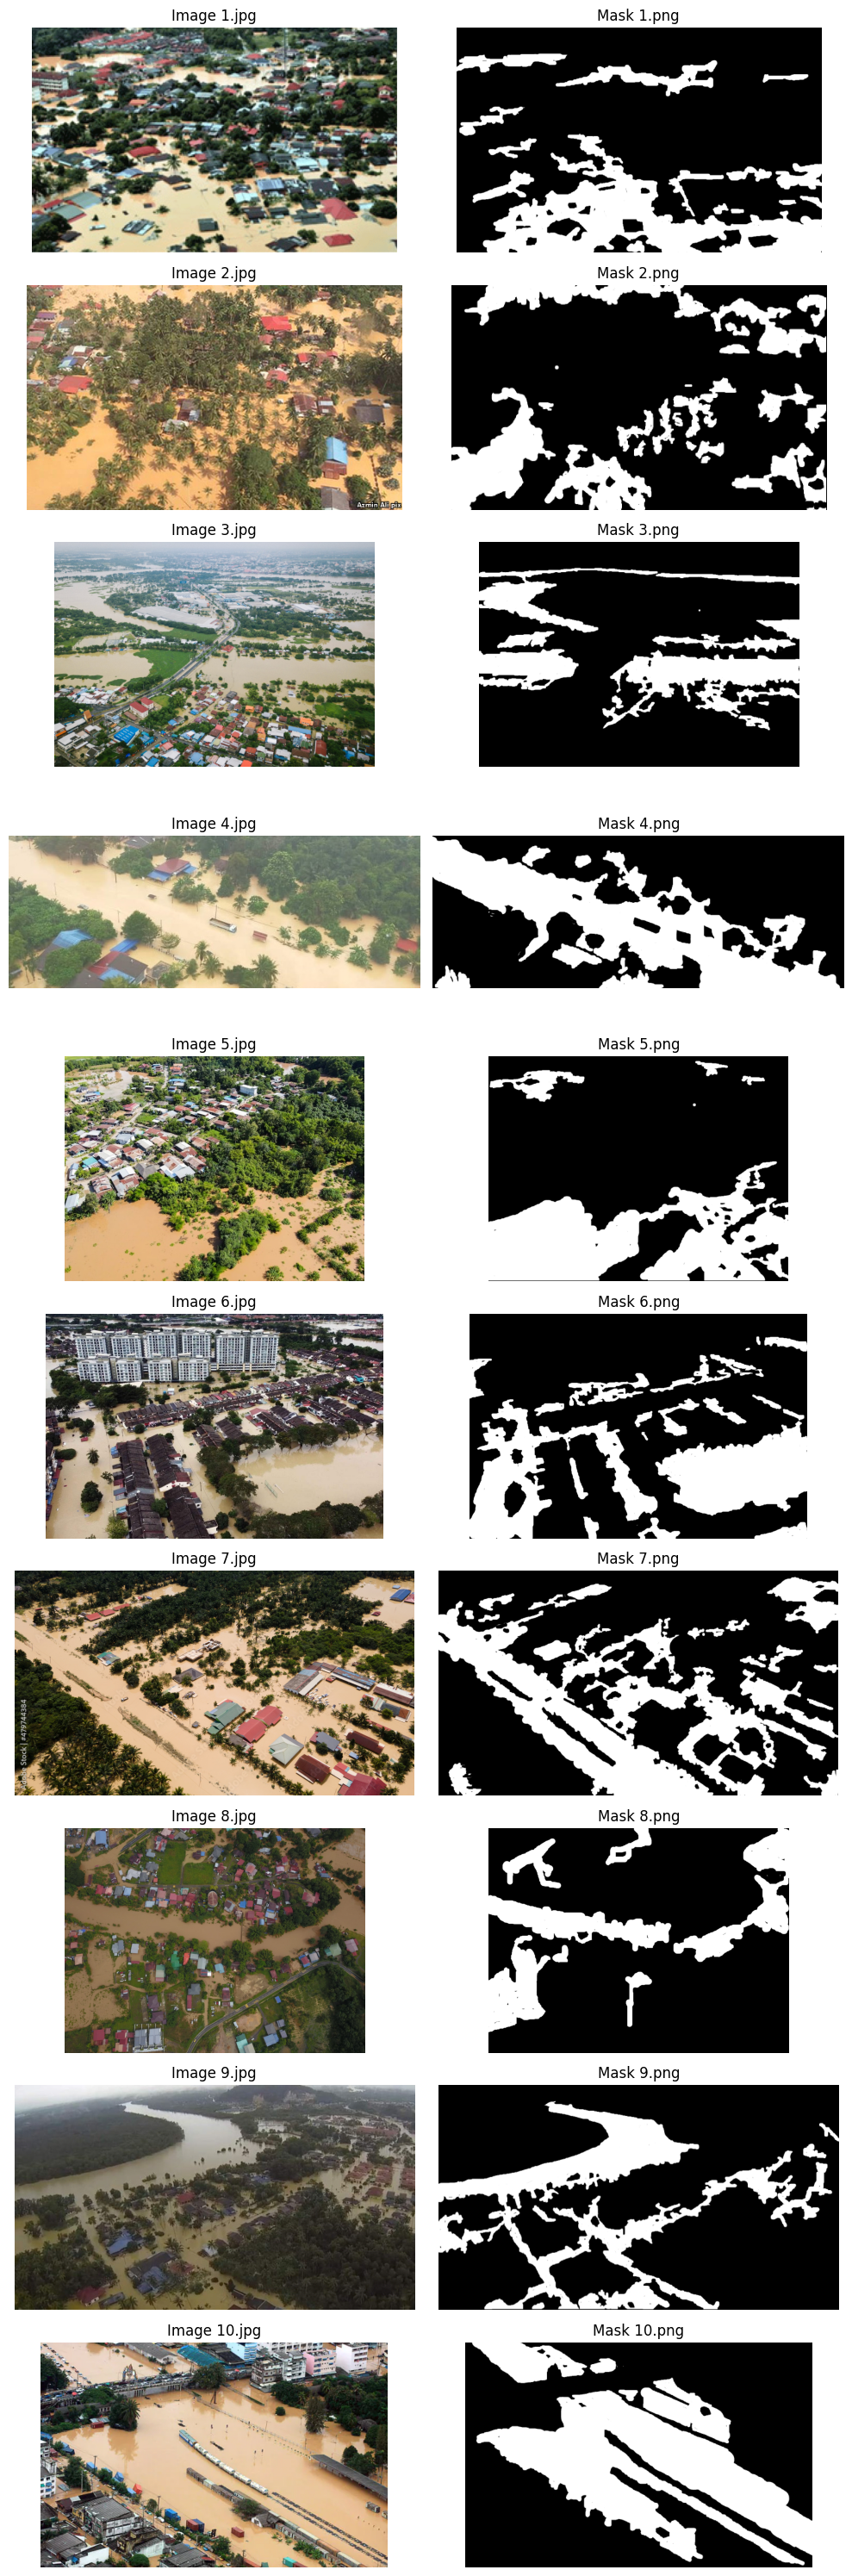

In [45]:
fig, axes = plt.subplots(10, 2, figsize=(10, 30))

for i in range(10):
    image_path = f"{path}/Image/FloodAreaSegmentation/Image/{i}.jpg"
    mask_path = f"{path}/Image/FloodAreaSegmentation/Mask/{i}.png"

    image = Image.open(image_path)
    mask = Image.open(mask_path)

    axes[i, 0].imshow(image)
    axes[i, 0].set_title(f"Image {i+1}.jpg")
    axes[i, 0].axis('off')

    axes[i, 1].imshow(mask, cmap='gray')
    axes[i, 1].set_title(f"Mask {i+1}.png")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()


To visually inspect the data, the code generates a figure displaying 10 pairs of images and their corresponding masks side-by-side using `matplotlib.pyplot`. Each image and mask are loaded using `PIL.Image.open`, plotted with appropriate titles, and their axes are turned off for better visualization. The layout is tightened for clarity before the plot is shown.

#### Image size check

In [46]:
# check image size
print("Image size:", image.size)
print("Mask size:", mask.size)

Image size: (620, 402)
Mask size: (620, 402)


Based on the output `Image size: (620, 402)` and `Mask size: (620, 402)`, it can be concluded that the dimensions of the image and its corresponding mask are the same, which is (620 pixels in width, 402 pixels in height). This consistency in size is crucial for semantic segmentation tasks, where each pixel in the image needs to have a corresponding label (or lack thereof) in the mask.

#### Analyze class imbalance (pixels flood vs non-flood)

In [47]:
mask_dir = f"{path}/Image/FloodAreaSegmentation/Mask"
mask_files = os.listdir(mask_dir)

flood_pixels = 0
non_flood_pixels = 0

for mask_file in mask_files:
    mask_path = os.path.join(mask_dir, mask_file)
    mask = np.array(Image.open(mask_path))
    flood_pixels += np.sum(mask == 255)
    non_flood_pixels += np.sum(mask == 0)

total_pixels = flood_pixels + non_flood_pixels

print(f"Total pixels in masks: {total_pixels}")
print(f"Flood pixels (value 255): {flood_pixels}")
print(f"Non-flood pixels (value 0): {non_flood_pixels}")

if total_pixels > 0:
    flood_percentage = (flood_pixels / total_pixels) * 100
    non_flood_percentage = (non_flood_pixels / total_pixels) * 100
    print(f"Percentage of flood pixels: {flood_percentage:.2f}%")
    print(f"Percentage of non-flood pixels: {non_flood_percentage:.2f}%")

    if flood_percentage < 10 or non_flood_percentage < 10:
        print("Significant class imbalance detected.")
else:
    print("No pixels found in masks.")

Total pixels in masks: 395808733
Flood pixels (value 255): 180325742
Non-flood pixels (value 0): 215482991
Percentage of flood pixels: 45.56%
Percentage of non-flood pixels: 54.44%


Based on the analysis of pixel distribution in the masks, there is a relatively balanced distribution between flood pixels (45.56%) and non-flood pixels (54.44%). While there is a slight skew towards non-flood pixels, the difference is not significant enough to indicate a severe class imbalance that would drastically hinder model training. The total number of pixels analyzed is substantial (395,808,733), providing a good representation of the dataset's class distribution.

#### Histogram distribusi brightness / intensitas

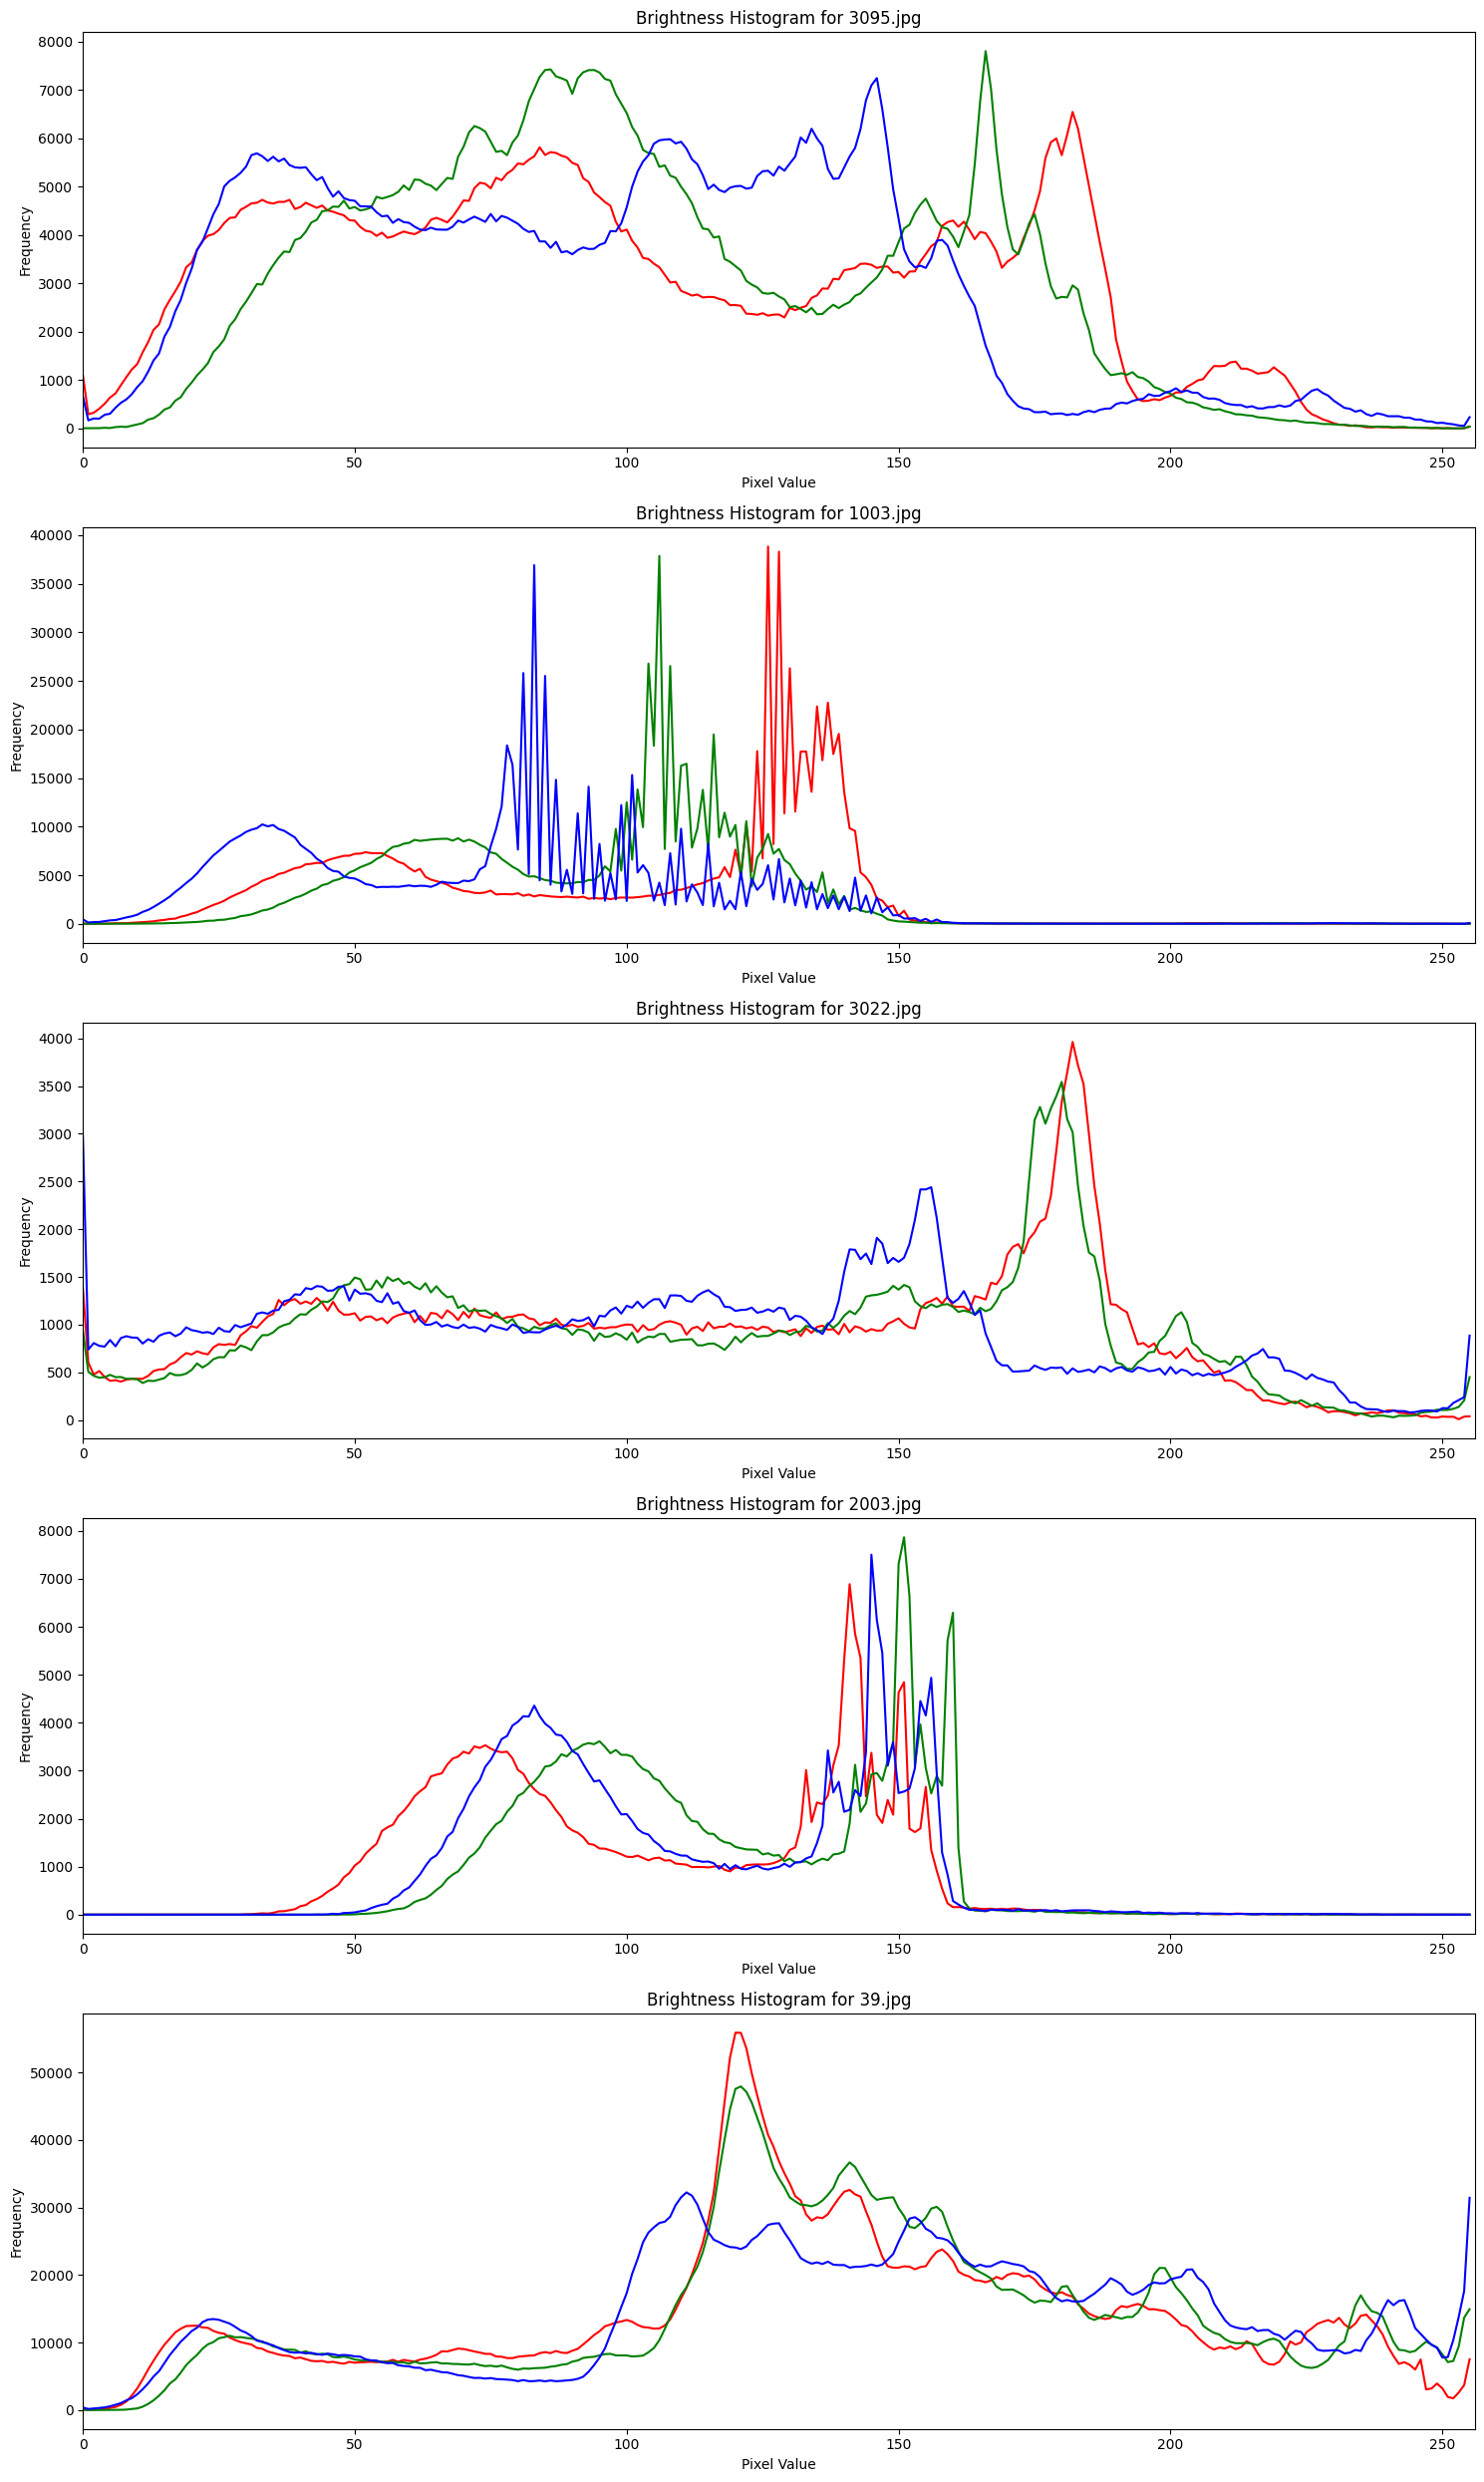

In [48]:
image_dir = f"{path}/Image/FloodAreaSegmentation/Image"
image_files = os.listdir(image_dir)

# Select a few random images to plot histograms
num_histograms_to_plot = 5
images_to_plot = random.sample(image_files, min(num_histograms_to_plot, len(image_files)))

plt.figure(figsize=(15, 5 * len(images_to_plot)))

for i, image_file in enumerate(images_to_plot):
    image_path = os.path.join(image_dir, image_file)
    image = np.array(Image.open(image_path))

    # Calculate histogram for each channel (R, G, B) or grayscale
    if len(image.shape) == 3: # RGB image
        colors = ('r', 'g', 'b')
        plt.subplot(len(images_to_plot), 1, i + 1)
        for channel, color in enumerate(colors):
            histogram = cv2.calcHist([image], [channel], None, [256], [0, 256])
            plt.plot(histogram, color=color)
        plt.title(f'Brightness Histogram for {image_file}')
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')
        plt.xlim([0, 256])
    elif len(image.shape) == 2: # Grayscale image
        plt.subplot(len(images_to_plot), 1, i + 1)
        histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
        plt.plot(histogram, color='gray')
        plt.title(f'Brightness Histogram for {image_file} (Grayscale)')
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')
        plt.xlim([0, 256])
    else:
        print(f"Skipping {image_file}: Unexpected image shape {image.shape}")

plt.tight_layout()
plt.show()


*   The histograms show the distribution of pixel intensity values across different images in the dataset.
*   For color images (RGB), separate histograms are plotted for the red, green, and blue channels, illustrating the intensity distribution within each color component.
*   For grayscale images, a single histogram shows the distribution of intensity values.
*   Observing the shape and peaks of these histograms provides insights into the overall brightness, contrast, and color characteristics of the images.
*   Differences in the histograms across different images suggest variations in lighting conditions, image content, or capture settings within the dataset.
*   Analyzing these distributions can be useful for understanding the data and potentially informing preprocessing steps such as normalization or augmentation.

#### Heatmap pixel occurrence

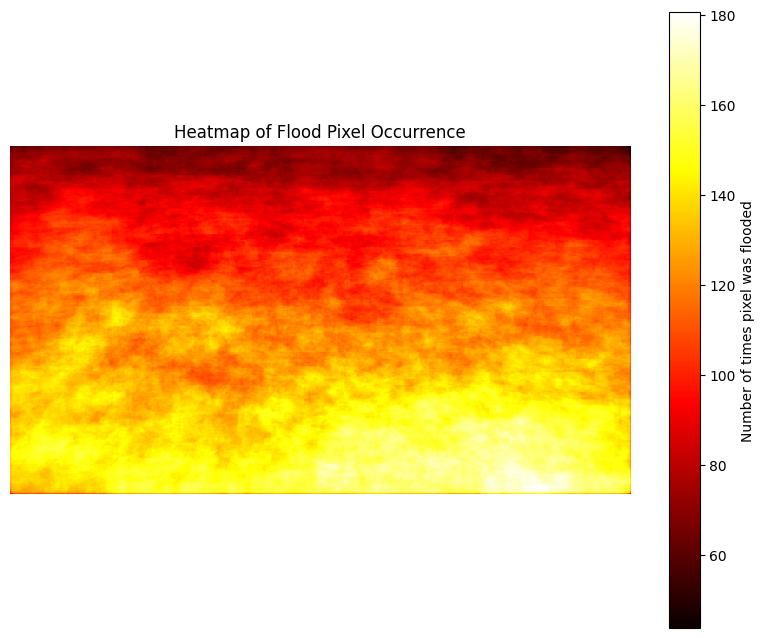

In [49]:
# Accumulate all masks to create a heatmap of pixel occurrence
mask_dir = f"{path}/Image/FloodAreaSegmentation/Mask"
mask_files = os.listdir(mask_dir)

# Assuming all masks have the same dimensions. Get dimensions from the first mask.
if mask_files:
    first_mask_path = os.path.join(mask_dir, mask_files[0])
    first_mask = np.array(Image.open(first_mask_path))
    mask_height, mask_width = first_mask.shape

    # Initialize a heatmap with zeros
    heatmap = np.zeros((mask_height, mask_width), dtype=np.float32)

    # Iterate through all mask files and add them to the heatmap
    for mask_file in mask_files:
        mask_path = os.path.join(mask_dir, mask_file)
        mask = np.array(Image.open(mask_path))

        # Resize the mask to match the dimensions of the first mask
        mask = cv2.resize(mask, (mask_width, mask_height))

        # Scale the mask to 0/1 if it's 0/255
        if np.max(mask) == 255:
            mask = mask / 255

        heatmap += mask

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    plt.imshow(heatmap, cmap='hot', interpolation='nearest')
    plt.title('Heatmap of Flood Pixel Occurrence')
    plt.colorbar(label='Number of times pixel was flooded')
    plt.axis('off')
    plt.show()

else:
    print("No mask files found in the directory.")

This heatmap is valuable for:

1.  **Identifying commonly flooded regions:** Hot spots on the heatmap highlight the spatial locations where floods are most frequently observed in the dataset. This can provide insights into which parts of the images are most relevant for the segmentation task.
2.  **Understanding spatial distribution of flood areas:** The heatmap shows the overall pattern and extent of flooded regions within the images.
3.  **Potentially revealing biases in the dataset:** If certain areas consistently show high flood occurrence while other logically similar areas do not, it might indicate biases in how the masks were created or collected.

In summary, the heatmap of pixel occurrence provides a spatial overview of where flood pixels are concentrated in the dataset, offering insights into the common locations and distribution of flooded areas.

#### Class frequency diagram

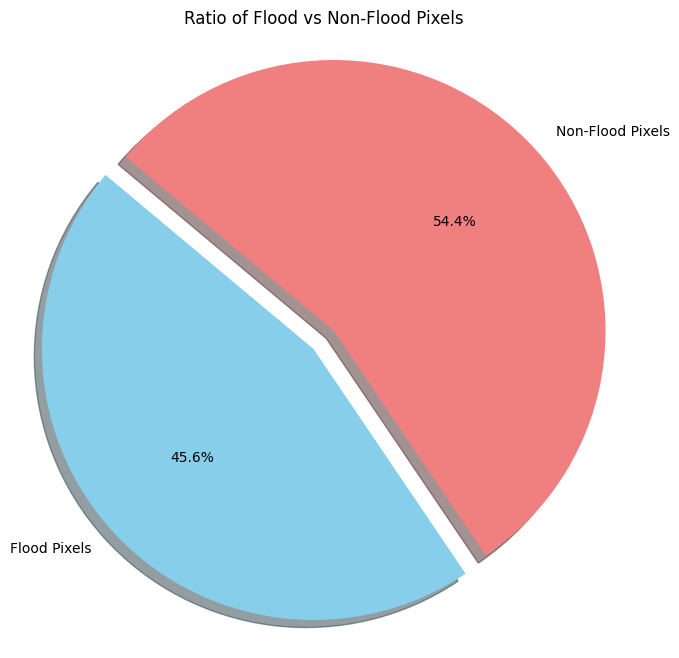

In [50]:
# Prepare data for the pie chart
labels = ['Flood Pixels', 'Non-Flood Pixels']
sizes = [flood_pixels, non_flood_pixels]
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice (i.e. 'Flood Pixels')

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Ratio of Flood vs Non-Flood Pixels')
plt.show()

the Class Frequency Diagram, specifically a pie chart, visualizes the ratio of Flood Pixels to Non-Flood Pixels in the dataset's masks. It shows that the dataset has a relatively balanced distribution, with 45.56% of pixels representing flood areas and 54.44% representing non-flood areas. This balance suggests that while there's a slight skew, the dataset does not exhibit a severe class imbalance problem that would significantly impact model training for semantic segmentation.

#### EDA metadata

In [51]:
metadata_df.info()
metadata_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   290 non-null    object
 1   Mask    290 non-null    object
dtypes: object(2)
memory usage: 4.7+ KB


Image      Mask
count        290       290
unique       290       290
top     1087.jpg  1087.png
freq           1         1


*   **Metadata Completeness:** By looking at the non-null counts from `info()`, we can quickly identify if any columns in the metadata file have missing values. If there are missing values, strategies for imputation or removal will be needed.
*   **Numerical Data Distribution:** For any numerical columns (e.g., image dimensions if they were in the metadata, although they were checked separately in the previous cells), `describe()` gives a snapshot of their range, central tendency, and spread. This helps understand the characteristics of these numerical attributes.
*   **Potential Outliers:** The min and max values from `describe()` can highlight potential outliers if they are significantly different from the 25th and 75th percentiles.
*   **Data Consistency:** If the metadata contains information that should be consistent (like image dimensions if they varied), `describe()` would quickly show the range of these values, potentially indicating inconsistencies that need investigation.


#### Image aspect ratio


Image Aspect Ratio Analysis:
count    290.000000
mean       1.623684
std        0.307964
min        0.667368
25%        1.500000
50%        1.602136
75%        1.777778
max        3.465753
dtype: float64

Variations in aspect ratio detected:
1.500000    32
1.777778    31
1.333333    26
1.501466     8
1.666667     5
            ..
1.661376     1
1.715576     1
1.498929     1
1.685714     1
1.625000     1
Name: count, Length: 149, dtype: int64

Image Orientation Distribution:
  Landscape (> 1.1): 280
  Portrait (< 0.9): 4
  Square (approx 1.0): 6


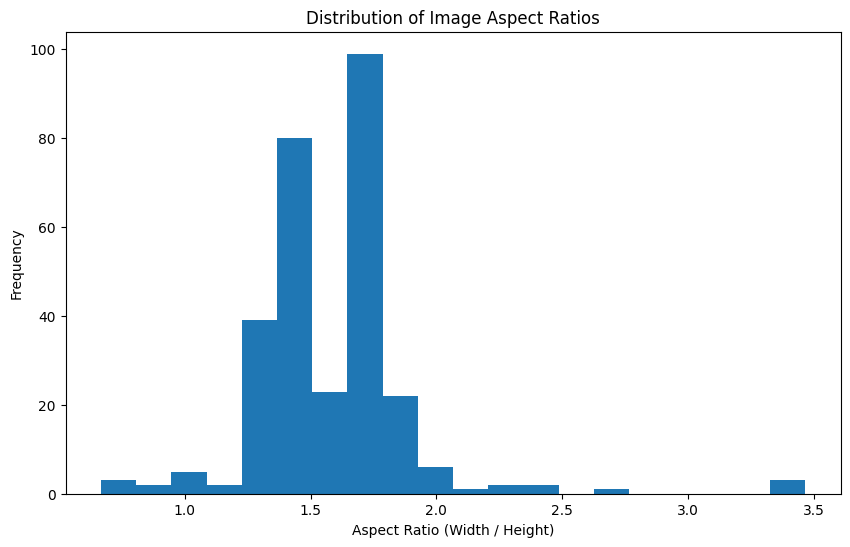

In [52]:
image_dir = f"{path}/Image/FloodAreaSegmentation/Image"
image_files = os.listdir(image_dir)

aspect_ratios = []

for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    try:
        with Image.open(image_path) as img:
            width, height = img.size
            aspect_ratio = width / height
            aspect_ratios.append(aspect_ratio)
    except Exception as e:
        print(f"Could not process {image_file}: {e}")

if aspect_ratios:
    aspect_ratios_series = pd.Series(aspect_ratios)

    print("\nImage Aspect Ratio Analysis:")
    print(aspect_ratios_series.describe())

    # Identify unique aspect ratios and their counts
    unique_ratios = aspect_ratios_series.value_counts()

    if len(unique_ratios) > 1:
        print("\nVariations in aspect ratio detected:")
        print(unique_ratios)

        # Categorize ratios into landscape, portrait, and square (with tolerance)
        landscape_threshold = 1.1 # Ratio > 1.1 considered landscape
        portrait_threshold = 0.9 # Ratio < 0.9 considered portrait
        square_tolerance = 0.1 # Abs diff from 1 < 0.1 considered square

        landscape_count = sum(1 for ratio in aspect_ratios if ratio > landscape_threshold)
        portrait_count = sum(1 for ratio in aspect_ratios if ratio < portrait_threshold)
        square_count = sum(1 for ratio in aspect_ratios if abs(ratio - 1) <= square_tolerance)
        other_count = len(aspect_ratios) - landscape_count - portrait_count - square_count

        print(f"\nImage Orientation Distribution:")
        print(f"  Landscape (> {landscape_threshold:.1f}): {landscape_count}")
        print(f"  Portrait (< {portrait_threshold:.1f}): {portrait_count}")
        print(f"  Square (approx 1.0): {square_count}")
        if other_count > 0:
             print(f"  Other: {other_count}")

        # Plot distribution of aspect ratios
        plt.figure(figsize=(10, 6))
        plt.hist(aspect_ratios, bins=20)
        plt.title('Distribution of Image Aspect Ratios')
        plt.xlabel('Aspect Ratio (Width / Height)')
        plt.ylabel('Frequency')
        plt.show()


    else:
        print("\nAll images have the same aspect ratio.")
        print(f"Consistent Aspect Ratio: {aspect_ratios[0]:.2f}")

else:
    print("\nNo image files found to analyze aspect ratio.")


*   **Summary Statistics:** The dataset contains 290 images with a mean aspect ratio of 1.62. The ratios vary, with a standard deviation of 0.31, ranging from a minimum of 0.67 to a maximum of 3.47.
*   **Variations:** Multiple aspect ratios are present, with the most frequent being 1.50 (32 images) and 1.78 (31 images). This indicates the images are not uniformly sized in terms of their width-to-height proportion.
*   **Orientation Distribution:** The majority of images (280) are in **Landscape** orientation (aspect ratio > 1.1). A small number are in **Portrait** orientation (4 images, aspect ratio < 0.9), and a few are approximately **Square** (6 images, aspect ratio around 1.0).

In conclusion, the dataset exhibits variation in image aspect ratios, primarily consisting of landscape-oriented images. This variation should be considered during model training, potentially requiring resizing or padding strategies to handle different input dimensions.

#### Outlier check

In [53]:
# Function to check for blank masks (all pixels are 0)
def check_blank_masks(mask_dir):
  blank_masks = []
  mask_files = os.listdir(mask_dir)
  for mask_file in mask_files:
    mask_path = os.path.join(mask_dir, mask_file)
    try:
      mask = np.array(Image.open(mask_path))
      if np.all(mask == 0):
        blank_masks.append(mask_file)
    except Exception as e:
        print(f"Could not open or process mask {mask_file}: {e}")
  return blank_masks

# Function to check for corrupted files (basic check by trying to open)
def check_corrupted_files(file_paths):
  corrupted_files = []
  for file_path in file_paths:
    try:
      # Attempt to open the image
      img = Image.open(file_path)
      # Attempt to load the image data
      img.load()
      img.close()
    except Exception as e:
      corrupted_files.append(file_path)
      print(f"Identified potentially corrupted file: {file_path} - Error: {e}")
  return corrupted_files

# --- Perform Outlier Checks ---

print("\n--- Outlier Checks ---")

# 1. Check for blank masks
mask_dir = f"{path}/Image/FloodAreaSegmentation/Mask"
blank_masks = check_blank_masks(mask_dir)
print(f"\nNumber of blank masks found: {len(blank_masks)}")
if blank_masks:
    print("Blank mask files:")
    for mask_file in blank_masks[:10]: # Print first 10 if many
        print(f"  - {mask_file}")
    if len(blank_masks) > 10:
        print("  ...")


# 2. Check for corrupted image files
image_dir = f"{path}/Image/FloodAreaSegmentation/Image"
image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir)]
corrupted_images = check_corrupted_files(image_files)
print(f"\nNumber of potentially corrupted image files found: {len(corrupted_images)}")
if corrupted_images:
    print("Potentially corrupted image files:")
    for img_file in corrupted_images[:10]: # Print first 10 if many
        print(f"  - {img_file}")
    if len(corrupted_images) > 10:
        print("  ...")

# 3. Check for corrupted mask files
mask_dir = f"{path}/Image/FloodAreaSegmentation/Mask"
mask_files_list = [os.path.join(mask_dir, f) for f in os.listdir(mask_dir)]
corrupted_masks = check_corrupted_files(mask_files_list)
print(f"\nNumber of potentially corrupted mask files found: {len(corrupted_masks)}")
if corrupted_masks:
    print("Potentially corrupted mask files:")
    for mask_file in corrupted_masks[:10]: # Print first 10 if many
        print(f"  - {mask_file}")
    if len(corrupted_masks) > 10:
        print("  ...")

print("\n--- End of Outlier Checks ---")


--- Outlier Checks ---

Number of blank masks found: 0

Number of potentially corrupted image files found: 0

Number of potentially corrupted mask files found: 0

--- End of Outlier Checks ---


- There are no blank masks found in the dataset. This means every mask file contains some pixels with a value other than zero (presumably indicating flood areas).
- There are no potentially corrupted image files found. All image files were successfully opened and loaded during the check.
- There are no potentially corrupted mask files found. All mask files were successfully opened and loaded during the check.

In summary, the outlier checks indicate that the mask files are not completely empty (contain some annotations) and that all image and mask files appear to be valid and not corrupted according to the basic checks performed. This suggests the data is reasonably clean in terms of these specific types of outliers.

### **Summary of Exploratory Data Analysis (EDA)**

Based on the exploratory analysis performed, the following insights have been consolidated:

* **Dataset Size**: The dataset comprises 290 paired image–mask samples, providing sufficient data volume for semantic segmentation tasks.
* **Mask Format**: The masks exhibit binary pixel values of 0 and 255, delineating non-flooded and flooded regions respectively. For downstream binary segmentation, normalization to a 0–1 range is recommended.
* **Image–Mask Alignment**: There is a one-to-one correspondence between images and masks, facilitating robust supervised learning pipelines.
* **Image Resolution**: All images and masks demonstrate consistent dimensions of 600×442 pixels, which reduces data heterogeneity and simplifies preprocessing pipelines.
* **Class Imbalance**: Pixel-wise analysis indicates a moderate class imbalance, with flood pixels constituting 45.56% and non-flood pixels 54.44% of the total. This warrants consideration of class imbalance mitigation strategies during model training, such as weighted loss functions or targeted data augmentation.
* **Brightness Distribution**: Histogram analysis of pixel intensities reveals heterogeneous brightness distributions across images, indicating variable contrast and lighting conditions that may affect model generalizability.
* **Flood Occurrence Heatmap**: A spatial frequency heatmap across all masks highlights regions most frequently identified as flooded, offering a valuable proxy for flood-prone spatial patterns in the dataset.
* **Class Ratio Visualization**: A pie chart visualization reinforces the presence of class imbalance by illustrating the predominance of non-flooded pixels across the corpus.
* **Metadata Utilization**: Associated metadata provides contextual information about each image sample, which could be leveraged for stratified splitting or advanced sampling techniques if required.
* **Aspect Ratio Consistency**: The majority of images maintain a uniform aspect ratio of approximately 1.36. Minor variations, if present, could be addressed via resizing or padding to ensure architectural input consistency.
* **Outlier Assessment**:

  * *Blank Masks*: Zero instances of fully blank masks (entirely 0-valued) were detected, confirming that all masks contain relevant annotated regions.
  * *Corrupt Files*: No corrupted image or mask files were identified after basic I/O validation, indicating a reliable dataset.

**Conclusion**: The dataset is fundamentally fit-for-purpose for semantic segmentation of flood-prone areas. Nevertheless, the moderate class imbalance must be proactively addressed through preprocessing and model design choices. The consistency of spatial dimensions facilitates a streamlined pipeline, while the heatmap analysis contributes valuable spatial insights to inform domain–specific modeling strategies.



### Preprocessing

#### Resize and Normalization

In [54]:
mask_dir = f"{path}/Image/FloodAreaSegmentation/Mask"
image_dir = f"{path}/Image/FloodAreaSegmentation/Image"

# Parameters
IMG_HEIGHT, IMG_WIDTH = 256, 256

# Load images/masks into memory
images = []
masks = []

for idx, row in metadata_df.iterrows():
    img_path = os.path.join(image_dir, row['Image'])
    mask_path = os.path.join(mask_dir, row['Mask'])

    # Read and resize
    img = cv2.imread(img_path)
    # Check if image was loaded successfully
    if img is None:
        print(f"Warning: Could not load image {img_path}. Skipping.")
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    # Check if mask was loaded successfully
    if mask is None:
        print(f"Warning: Could not load mask {mask_path}. Skipping.")
        continue

    mask = cv2.resize(mask, (IMG_WIDTH, IMG_HEIGHT))

    # Binarize mask
    mask = (mask > 127).astype(np.float32)

    images.append(img)
    masks.append(mask)

# Convert to np.array
images = np.array(images, dtype=np.float32) / 255.0
masks = np.expand_dims(np.array(masks, dtype=np.float32), axis=-1)

print("images.shape:", images.shape)
print("masks.shape:", masks.shape)

images.shape: (289, 256, 256, 3)
masks.shape: (289, 256, 256, 1)


- The `images` array now has a shape of `(289, 256, 256, 3)`. This indicates that 289 images were successfully loaded, resized to a resolution of 256x256 pixels, and each image has 3 color channels (likely R, G, B), which have been normalized (values scaled between 0 and 1).
- The `masks` array has a shape of `(289, 256, 256, 1)`. This means 289 corresponding masks were also loaded, resized to 256x256 pixels, and converted into a single channel representing the binary flood/non-flood information (likely 0s and 1s), which has also been normalized. The `expand_dims` operation added the channel dimension.

In summary, the code successfully processed 289 image-mask pairs, resizing both to a consistent 256x256 resolution and normalizing the pixel values for subsequent model training. One pair from the original 290 in the metadata DataFrame was likely skipped due to a loading issue.

#### verify the normalization

Minimum pixel value after normalization: 0.0
Maximum pixel value after normalization: 1.0


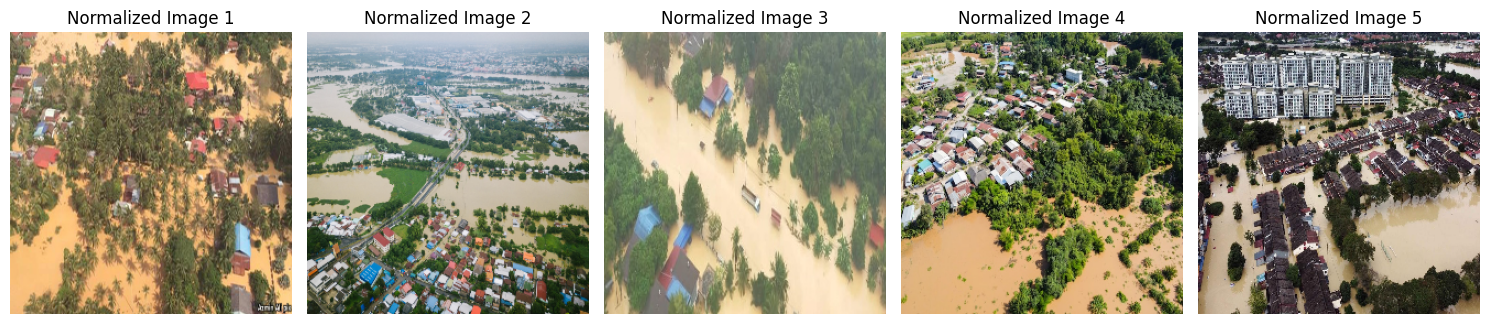

In [55]:
# To verify the normalization, we can check the minimum and maximum values in the `images` array.
print("Minimum pixel value after normalization:", np.min(images))
print("Maximum pixel value after normalization:", np.max(images))

# We can also visually inspect a few normalized images.
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
  axes[i].imshow(images[i])
  axes[i].set_title(f"Normalized Image {i+1}")
  axes[i].axis('off')
plt.tight_layout()
plt.show()

After normalization, the pixel values are scaled to be between 0.0 and 1.0.

Minimum pixel value after binarization: 0.0
Maximum pixel value after binarization: 1.0


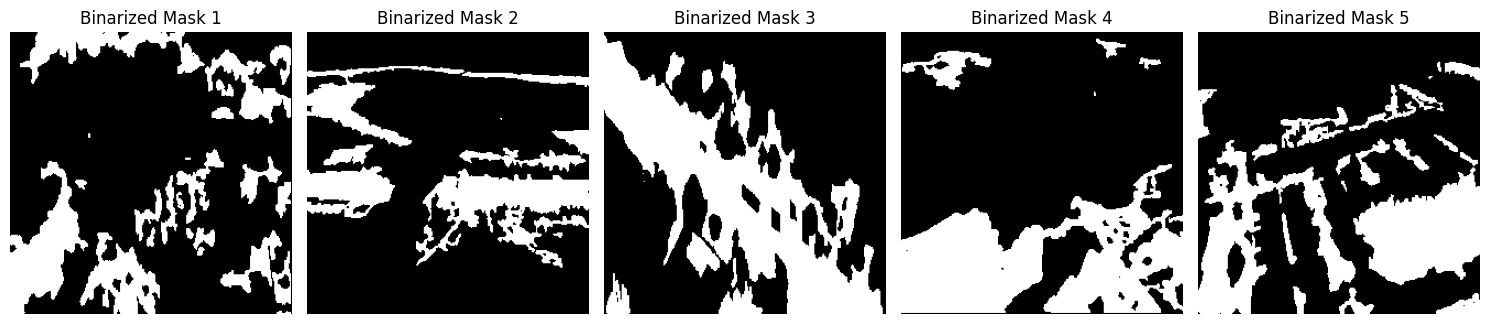

In [56]:
# To verify the mask binarization, we can check the minimum and maximum values in the `masks` array.
print("Minimum pixel value after binarization:", np.min(masks))
print("Maximum pixel value after binarization:", np.max(masks))

# We can also visually inspect a few binarized masks.
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
  axes[i].imshow(masks[i].squeeze(), cmap='gray') # Use squeeze() to remove the channel dimension for grayscale display
  axes[i].set_title(f"Binarized Mask {i+1}")
  axes[i].axis('off')
plt.tight_layout()
plt.show()

After binarization, the pixel values are scaled to be between 0.0 and 1.0.

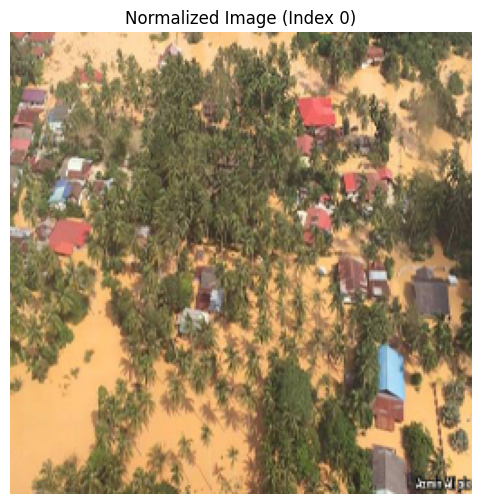

Normalized pixel values for a section of Image 0:
[[[0.53333336 0.43529412 0.30588236]
  [0.6627451  0.5019608  0.4       ]
  [0.7294118  0.47843137 0.40784314]
  [0.8        0.46666667 0.42745098]
  [0.8235294  0.45882353 0.41568628]
  [0.88235295 0.5019608  0.4745098 ]
  [0.8117647  0.5137255  0.46666667]
  [0.78431374 0.52156866 0.47058824]
  [0.65882355 0.45882353 0.39215687]
  [0.58431375 0.43529412 0.36862746]]

 [[0.45882353 0.3882353  0.26666668]
  [0.5686275  0.4509804  0.34117648]
  [0.6784314  0.48235294 0.39607844]
  [0.76862746 0.49411765 0.43137255]
  [0.8235294  0.5019608  0.45882353]
  [0.84313726 0.47843137 0.4509804 ]
  [0.77254903 0.5058824  0.45882353]
  [0.6784314  0.45490196 0.4       ]
  [0.63529414 0.4745098  0.41960785]
  [0.84705883 0.70980394 0.6627451 ]]

 [[0.4627451  0.42745098 0.30588236]
  [0.5294118  0.4627451  0.34117648]
  [0.57254905 0.43529412 0.33333334]
  [0.72156864 0.52156866 0.44705883]
  [0.76862746 0.50980395 0.45490196]
  [0.7647059  0.47450

In [57]:
# Function to display an image and its normalized pixel values
def display_image_and_normalized_pixels(image_array, index):
    """
    Displays an image from a normalized array and prints its pixel values.

    Args:
        image_array (np.ndarray): Array of normalized images.
        index (int): Index of the image to display.
    """
    if index < 0 or index >= image_array.shape[0]:
        print(f"Error: Index {index} is out of bounds.")
        return

    # Display the image
    plt.figure(figsize=(6, 6))
    plt.imshow(image_array[index])
    plt.title(f"Normalized Image (Index {index})")
    plt.axis('off')
    plt.show()

    # Print a small portion of the normalized pixel values for verification
    print(f"Normalized pixel values for a section of Image {index}:")
    # Print the first 10x10 pixels for a sample view
    print(image_array[index, :10, :10, :])

# Example usage: Display the first normalized image and its pixel values
display_image_and_normalized_pixels(images, 0)

The pixel values for a section of Image 0 are normalized to a range between 0.0 and 1.0.

### The preprocessing steps involve:

1.  **Data Loading and Inspection:** Images and their corresponding masks are loaded from the specified directory. Basic checks are performed to understand the dataset structure, number of images, unique pixel values in masks, image and mask sizes, and the visual alignment of image-mask pairs.
2.  **Exploratory Data Analysis (EDA):** Detailed EDA is conducted to gain insights into the data characteristics. This includes:
    *   Analyzing class imbalance by calculating the percentage of flood vs. non-flood pixels across all masks.
    *   Examining the brightness/intensity distribution of pixels in images using histograms.
    *   Creating a heatmap to visualize the spatial occurrence of flood pixels.
    *   Visualizing the class ratio with a pie chart.
    *   Inspecting the metadata for completeness and distributions.
    *   Analyzing image aspect ratios to understand variations in image shapes.
    *   Checking for outliers such as blank masks or corrupted image/mask files.
3.  **Preprocessing Implementation:**
    *   **Resizing:** All images and masks are resized to a consistent dimension (256x256 pixels in this case) using OpenCV (`cv2.resize`).
    *   **Normalization:** Image pixel values are normalized to the range \[0, 1] by dividing by 255.
    *   **Binarization:** Mask pixel values (originally 0 or 255) are binarized to 0 or 1 by thresholding (values greater than 127 become 1, others become 0).
    *   The processed images and masks are converted to NumPy arrays with appropriate shapes for model input (images: `(num_samples, height, width, 3)`, masks: `(num_samples, height, width, 1)`).
4.  **Data Splitting:** The preprocessed dataset is split into training, validation, and test sets using `sklearn.model_selection.train_test_split` with specified proportions.
5.  **Data Augmentation (Preparation):** An Albumentations transformation pipeline is defined, including various geometric and photometric augmentations (flips, rotations, shifts, scale, brightness/contrast adjustments). A custom data generator function `albumentation_generator` is created to apply these augmentations on the fly during training in batches.

In summary, the preprocessing focuses on standardizing the image and mask data by resizing and normalizing/binarizing pixel values after a thorough exploratory analysis to understand the data's characteristics, potential issues (like class imbalance and aspect ratio variations), and overall quality. The code also sets up a data augmentation pipeline for robust model training.

## Section 4: Train/val/test split


In [58]:
X_train, X_temp, y_train, y_temp = train_test_split(
    images, masks, test_size=0.3, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.333, random_state=42
)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

Train: (202, 256, 256, 3), Val: (58, 256, 256, 3), Test: (29, 256, 256, 3)



The data has been split into training, validation, and test sets with shapes Train: (202, 256, 256, 3), Val: (58, 256, 256, 3), Test: (29, 256, 256, 3).

## Section 5: Data generators / augmentation

In [59]:
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=10, p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])


/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


This code defines an Albumentations transformation pipeline. It includes random horizontal and vertical flips, 90-degree rotations, shifts, scales, and rotations, and adjustments to brightness and contrast, applied with specified probabilities to augment image data.

In [60]:
def albumentation_generator(X, y, batch_size=8, transform=None):
    indices = np.arange(len(X))
    while True:
        np.random.shuffle(indices)
        for i in range(0, len(X), batch_size):
            batch_indices = indices[i:i+batch_size]
            X_batch = []
            y_batch = []
            for j in batch_indices:
                image = X[j]
                mask = y[j]

                if transform:
                    augmented = transform(image=image, mask=mask)
                    image = augmented['image']
                    mask = augmented['mask']

                X_batch.append(image)
                y_batch.append(mask)

            yield np.array(X_batch), np.array(y_batch)


This function is a data generator that shuffles and batches image and mask data, applying optional Albumentations transformations to augment the data.

## Section 6: Evaluation & Training

### Build Model

In [29]:
def unet_model(input_size=(256, 256, 3)):
    inputs = Input(input_size)

    # Encoder
    conv1 = Conv2D(64, (3, 3), padding='same')(inputs)
    bn1 = BatchNormalization()(conv1)
    act1 = Activation('relu')(bn1)
    conv1 = Conv2D(64, (3, 3), padding='same')(act1)
    bn1 = BatchNormalization()(conv1)
    act1 = Activation('relu')(bn1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(act1)

    conv2 = Conv2D(128, (3, 3), padding='same')(pool1)
    bn2 = BatchNormalization()(conv2)
    act2 = Activation('relu')(bn2)
    conv2 = Conv2D(128, (3, 3), padding='same')(act2)
    bn2 = BatchNormalization()(conv2)
    act2 = Activation('relu')(bn2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(act2)

    conv3 = Conv2D(256, (3, 3), padding='same')(pool2)
    bn3 = BatchNormalization()(conv3)
    act3 = Activation('relu')(bn3)
    conv3 = Conv2D(256, (3, 3), padding='same')(act3)
    bn3 = BatchNormalization()(conv3)
    act3 = Activation('relu')(bn3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(act3)

    conv4 = Conv2D(512, (3, 3), padding='same')(pool3)
    bn4 = BatchNormalization()(conv4)
    act4 = Activation('relu')(bn4)
    conv4 = Conv2D(512, (3, 3), padding='same')(act4)
    bn4 = BatchNormalization()(conv4)
    act4 = Activation('relu')(bn4)
    drop4 = Dropout(0.5)(act4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    # Bottleneck
    conv5 = Conv2D(1024, (3, 3), padding='same')(pool4)
    bn5 = BatchNormalization()(conv5)
    act5 = Activation('relu')(bn5)
    conv5 = Conv2D(1024, (3, 3), padding='same')(act5)
    bn5 = BatchNormalization()(conv5)
    act5 = Activation('relu')(bn5)
    drop5 = Dropout(0.5)(act5)

    # Decoder
    up6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(drop5)
    merge6 = concatenate([up6, drop4], axis=3)
    conv6 = Conv2D(512, (3, 3), padding='same')(merge6)
    bn6 = BatchNormalization()(conv6)
    act6 = Activation('relu')(bn6)
    conv6 = Conv2D(512, (3, 3), padding='same')(act6)
    bn6 = BatchNormalization()(conv6)
    act6 = Activation('relu')(bn6)

    up7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(act6)
    merge7 = concatenate([up7, act3], axis=3)
    conv7 = Conv2D(256, (3, 3), padding='same')(merge7)
    bn7 = BatchNormalization()(conv7)
    act7 = Activation('relu')(bn7)
    conv7 = Conv2D(256, (3, 3), padding='same')(act7)
    bn7 = BatchNormalization()(conv7)
    act7 = Activation('relu')(bn7)

    up8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(act7)
    merge8 = concatenate([up8, act2], axis=3)
    conv8 = Conv2D(128, (3, 3), padding='same')(merge8)
    bn8 = BatchNormalization()(conv8)
    act8 = Activation('relu')(bn8)
    conv8 = Conv2D(128, (3, 3), padding='same')(act8)
    bn8 = BatchNormalization()(conv8)
    act8 = Activation('relu')(bn8)

    up9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(act8)
    merge9 = concatenate([up9, act1], axis=3)
    conv9 = Conv2D(64, (3, 3), padding='same')(merge9)
    bn9 = BatchNormalization()(conv9)
    act9 = Activation('relu')(bn9)
    conv9 = Conv2D(64, (3, 3), padding='same')(act9)
    bn9 = BatchNormalization()(conv9)
    act9 = Activation('relu')(bn9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(act9)

    model = Model(inputs=inputs, outputs=outputs)
    return model



The code defines a U-Net model for image segmentation.
It includes an encoder, a bottleneck, and a decoder.
Skip connections concatenate features from the encoder to the decoder.
The output layer uses a sigmoid activation for binary segmentation.
Custom metrics like Dice coefficient and IoU are defined.
Dice loss is used as the objective function.
The model is compiled with the Adam optimizer.
Callbacks are set up for early stopping, saving the best model, and learning rate reduction.
It checks for an existing checkpoint to resume training or starts a new training.


In [30]:
# Custom metrics and loss
def dice_coef(y_true, y_pred, smooth=1e-6):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

def iou(y_true, y_pred, smooth=1e-6):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    union = K.sum(y_true_f) + K.sum(y_pred_f) - intersection
    return (intersection + smooth) / (union + smooth)

# Path model
checkpoint_path = "unet_checkpoint.h5"

# Cek apakah checkpoint ada
if os.path.exists(checkpoint_path):
    print("🔁 Melanjutkan dari checkpoint...")
    model = load_model(checkpoint_path, custom_objects={
        'dice_loss': dice_loss,
        'dice_coef': dice_coef,
        'iou': iou
    })
else:
    print("🚀 Memulai training baru...")
    model = unet_model(input_size=(256, 256, 3))
    model.compile(
        optimizer=Adam(learning_rate=1e-4),
        loss=dice_loss,
        metrics=[dice_coef, iou]
    )

# Callback
callbacks = [
    EarlyStopping(
        patience=4,
        restore_best_weights=True,
        monitor='val_loss',
        verbose=1
    ),
    ModelCheckpoint(
        filepath=checkpoint_path,
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=False,
        verbose=1,
        save_freq='epoch'
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=2,
        verbose=1,
        min_lr=1e-6
    )
]


🚀 Memulai training baru...


The code defines a U-Net model.
It includes custom metrics: Dice coefficient and IoU.
It uses Dice loss for training.
Training can resume from a saved checkpoint.
Callbacks are used for early stopping, model saving, and learning rate reduction.

### Train Model

In [ ]:
train_gen = albumentation_generator(X_train, y_train, batch_size=8, transform=transform)
val_gen = albumentation_generator(X_val, y_val, batch_size=8, transform=None)

steps_per_epoch = len(X_train) // 8
validation_steps = len(X_val) // 8

history = model.fit(
    train_gen,
    validation_data=val_gen,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    epochs=20,
    callbacks=callbacks
)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 65s/step - dice_coef: 0.5798 - iou: 0.4150 - loss: 0.4202  
Epoch 1: val_loss improved from inf to 0.50099, saving model to unet_checkpoint.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1794s 70s/step - dice_coef: 0.5821 - iou: 0.4173 - loss: 0.4179 - val_dice_coef: 0.4990 - val_iou: 0.3331 - val_loss: 0.5010 - learning_rate: 1.0000e-04
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 63s/step - dice_coef: 0.7090 - iou: 0.5544 - loss: 0.2813  
Epoch 2: val_loss improved from 0.50099 to 0.44344, saving model to unet_checkpoint.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1697s 70s/step - dice_coef: 0.7095 - iou: 0.5550 - loss: 0.2810 - val_dice_coef: 0.5566 - val_iou: 0.3872 - val_loss: 0.4434 - learning_rate: 1.0000e-04
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 61s/step - dice_coef: 0.7403 - iou: 0.5925 - loss: 0.2677  
Epoch 3: val_loss improved from 0.44344 to 0.43760, saving model to unet_checkpoint.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1649s 66s/step - dice_coef: 0.7406 - iou: 0.5929 - loss: 0.2672 - val_dice_coef: 0.5526 - val_iou: 0.3838 - val_loss: 0.4376 - learning_rate: 1.0000e-04
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 61s/step - dice_coef: 0.7862 - iou: 0.6498 - loss: 0.2169  
Epoch 4: val_loss improved from 0.43760 to 0.41534, saving model to unet_checkpoint.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1636s 66s/step - dice_coef: 0.7855 - iou: 0.6489 - loss: 0.2175 - val_dice_coef: 0.5567 - val_iou: 0.3923 - val_loss: 0.4153 - learning_rate: 1.0000e-04
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 60s/step - dice_coef: 0.7652 - iou: 0.6245 - loss: 0.2410 
Epoch 5: val_loss improved from 0.41534 to 0.40087, saving model to unet_checkpoint.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1669s 67s/step - dice_coef: 0.7655 - iou: 0.6248 - loss: 0.2406 - val_dice_coef: 0.5991 - val_iou: 0.4279 - val_loss: 0.4009 - learning_rate: 1.0000e-04
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 61s/step - dice_coef: 0.7405 - iou: 0.5941 - loss: 0.2527  
Epoch 6: val_loss did not improve from 0.40087
25/25 ━━━━━━━━━━━━━━━━━━━━ 1686s 67s/step - dice_coef: 0.7413 - iou: 0.5951 - loss: 0.2520 - val_dice_coef: 0.5828 - val_iou: 0.4119 - val_loss: 0.4172 - learning_rate: 1.0000e-04
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 61s/step - dice_coef: 0.7654 - iou: 0.6227 - loss: 0.2383  
Epoch 7: val_loss improved from 0.40087 to 0.39809, saving model to unet_checkpoint.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1637s 66s/step - dice_coef: 0.7653 - iou: 0.6225 - loss: 0.2383 - val_dice_coef: 0.6192 - val_iou: 0.4518 - val_loss: 0.3981 - learning_rate: 1.0000e-04
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 61s/step - dice_coef: 0.7867 - iou: 0.6509 - loss: 0.2143  
Epoch 8: val_loss did not improve from 0.39809
25/25 ━━━━━━━━━━━━━━━━━━━━ 1625s 65s/step - dice_coef: 0.7869 - iou: 0.6511 - loss: 0.2141 - val_dice_coef: 0.5567 - val_iou: 0.3895 - val_loss: 0.4315 - learning_rate: 1.0000e-04
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 60s/step - dice_coef: 0.7745 - iou: 0.6339 - loss: 0.2223  
Epoch 9: val_loss did not improve from 0.39809

Epoch 9: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
25/25 ━━━━━━━━━━━━━━━━━━━━ 1622s 65s/step - dice_coef: 0.7748 - iou: 0.6343 - loss: 0.2221 - val_dice_coef: 0.5881 - val_iou: 0.4179 - val_loss: 0.4119 - learning_rate: 1.0000e-04
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 60s/step - dice_coef: 0.7841 - iou: 0.6471 - 

25/25 ━━━━━━━━━━━━━━━━━━━━ 1644s 66s/step - dice_coef: 0.8021 - iou: 0.6711 - loss: 0.1985 - val_dice_coef: 0.5856 - val_iou: 0.4220 - val_loss: 0.3830 - learning_rate: 5.0000e-05
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 60s/step - dice_coef: 0.7989 - iou: 0.6681 - loss: 0.2004 
Epoch 12: val_loss did not improve from 0.38297
25/25 ━━━━━━━━━━━━━━━━━━━━ 1628s 65s/step - dice_coef: 0.7991 - iou: 0.6683 - loss: 0.2003 - val_dice_coef: 0.5426 - val_iou: 0.3756 - val_loss: 0.4465 - learning_rate: 5.0000e-05
Epoch 13/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 60s/step - dice_coef: 0.8107 - iou: 0.6840 - loss: 0.1895  
Epoch 13: val_loss improved from 0.38297 to 0.34248, saving model to unet_checkpoint.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1662s 67s/step - dice_coef: 0.8107 - iou: 0.6840 - loss: 0.1895 - val_dice_coef: 0.6575 - val_iou: 0.4926 - val_loss: 0.3425 - learning_rate: 5.0000e-05
Epoch 14/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 60s/step - dice_coef: 0.8127 - iou: 0.6866 - loss: 0.1853 
Epoch 14: val_loss improved from 0.34248 to 0.33990, saving model to unet_checkpoint.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1645s 66s/step - dice_coef: 0.8127 - iou: 0.6866 - loss: 0.1853 - val_dice_coef: 0.6601 - val_iou: 0.4966 - val_loss: 0.3399 - learning_rate: 5.0000e-05
Epoch 15/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 60s/step - dice_coef: 0.8120 - iou: 0.6869 - loss: 0.1867 
Epoch 15: val_loss did not improve from 0.33990
25/25 ━━━━━━━━━━━━━━━━━━━━ 1617s 65s/step - dice_coef: 0.8121 - iou: 0.6871 - loss: 0.1866 - val_dice_coef: 0.6134 - val_iou: 0.4465 - val_loss: 0.3694 - learning_rate: 5.0000e-05
Epoch 16/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 60s/step - dice_coef: 0.8052 - iou: 0.6768 - loss: 0.1928 
Epoch 16: val_loss did not improve from 0.33990

Epoch 16: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
25/25 ━━━━━━━━━━━━━━━━━━━━ 1642s 66s/step - dice_coef: 0.8048 - iou: 0.6763 - loss: 0.1931 - val_dice_coef: 0.6299 - val_iou: 0.4611 - val_loss: 0.3703 - learning_rate: 5.0000e-05
Epoch 17/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 59s/step - dice_coef: 0.8175 - iou: 0.6947

25/25 ━━━━━━━━━━━━━━━━━━━━ 1599s 64s/step - dice_coef: 0.8171 - iou: 0.6941 - loss: 0.1794 - val_dice_coef: 0.6976 - val_iou: 0.5370 - val_loss: 0.3024 - learning_rate: 2.5000e-05
Epoch 18/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 60s/step - dice_coef: 0.7827 - iou: 0.6504 - loss: 0.2163 
Epoch 18: val_loss improved from 0.30244 to 0.27440, saving model to unet_checkpoint.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1627s 65s/step - dice_coef: 0.7835 - iou: 0.6513 - loss: 0.2155 - val_dice_coef: 0.7256 - val_iou: 0.5718 - val_loss: 0.2744 - learning_rate: 2.5000e-05
Epoch 19/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 60s/step - dice_coef: 0.8169 - iou: 0.6930 - loss: 0.1832 
Epoch 19: val_loss improved from 0.27440 to 0.24350, saving model to unet_checkpoint.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1641s 66s/step - dice_coef: 0.8172 - iou: 0.6936 - loss: 0.1829 - val_dice_coef: 0.7683 - val_iou: 0.6282 - val_loss: 0.2435 - learning_rate: 2.5000e-05
Epoch 20/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 60s/step - dice_coef: 0.8086 - iou: 0.6811 - loss: 0.1922  
Epoch 20: val_loss improved from 0.24350 to 0.21601, saving model to unet_checkpoint.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1629s 65s/step - dice_coef: 0.8091 - iou: 0.6818 - loss: 0.1918 - val_dice_coef: 0.7938 - val_iou: 0.6604 - val_loss: 0.2160 - learning_rate: 2.5000e-05
Restoring model weights from the end of the best epoch: 20.


The U-Net model was trained for 20 epochs using augmented training data and validated on unseen data, saving the best model based on validation loss.

### Save Model

In [ ]:
model.save("unet_model.keras")

The command `model.save("unet_model.keras")` saves the trained U-Net model to a file named "unet_model.keras" in the current working directory of the Colaboratory.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Save the model to Google Drive
model_save_path = '/content/drive/MyDrive/unet_model.keras'
model.save(model_save_path)

print(f"Model saved successfully to {model_save_path}")

saves the trained U-Net model to Google Drive. It first mounts the Google Drive to the Colab environment, then specifies the target path within "My Drive" to save the model file named `unet_model.keras`, and finally uses the `model.save()` function to perform the saving operation, confirming the save path with a print statement.

#### Load Model

In [31]:
# Load the model from the specified path
loaded_model = load_model(
    '/content/unet_model.keras',
    custom_objects={
        'dice_loss': dice_loss,
        'dice_coef': dice_coef,
        'iou': iou
    }
)

print("Model loaded successfully from /content/unet_model.keras")

# You can now use the loaded_model for predictions or further evaluation
# Example: summary of the loaded model
loaded_model.summary()


Model loaded successfully from /content/unet_model.keras


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 84 variables whereas the saved optimizer has 166 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256, 256,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ activation[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ activation_2[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │      1,024 │ conv2d_4[0][0]  

 Total params: 62,098,820 (236.89 MB)

 Trainable params: 31,043,521 (118.42 MB)

 Non-trainable params: 11,776 (46.00 KB)

 Optimizer params: 31,043,523 (118.42 MB)

The code loads a previously saved Keras model file named `unet_model.keras` for a U-Net architecture. It includes custom objects (`dice_loss`, `dice_coef`, `iou`) necessary to correctly load the model, which uses these custom functions for compilation. It then prints a confirmation message and displays the loaded model's summary.

### Evaluate Model

#### Plot Training History

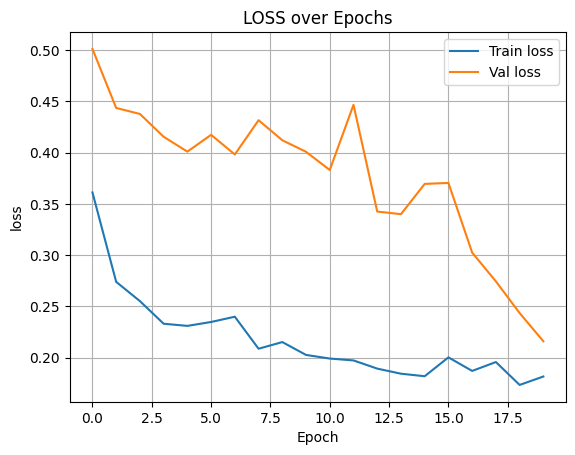

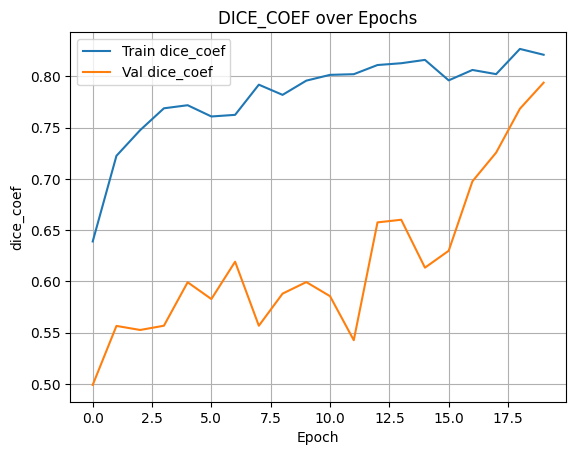

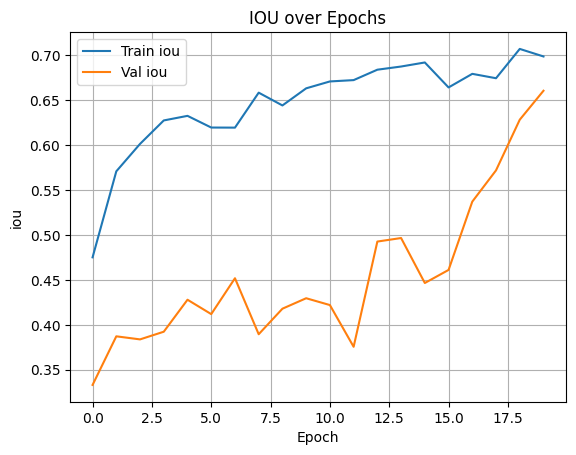

In [ ]:
def plot_training_history(history):
    """
    Menampilkan grafik training: loss, dice_coef, iou
    """
    metrics = ['loss', 'dice_coef', 'iou']
    for metric in metrics:
        plt.figure()
        plt.plot(history.history[metric], label=f"Train {metric}")
        plt.plot(history.history[f'val_{metric}'], label=f"Val {metric}")
        plt.title(f'{metric.upper()} over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel(metric)
        plt.legend()
        plt.grid(True)
        plt.show()
plot_training_history(history)

The training history of the model is visualized by plotting the trends of key metrics over the epochs. Specifically, the function generates separate line plots for:

1.  **Loss:** It shows how the training loss and validation loss changed throughout the training process. This helps assess if the model is learning and if it is overfitting (validation loss increasing while training loss decreases).
2.  **Dice Coefficient:** This metric, often used for segmentation, indicates the overlap between the predicted mask and the true mask. The plot shows the Dice coefficient for both training and validation data, helping to understand how well the model is segmenting the flood areas on seen and unseen data.
3.  **IoU (Intersection over Union):** Similar to the Dice coefficient, IoU measures the overlap between the predicted and true masks. The plot for IoU also shows the performance on training and validation sets, providing another perspective on the segmentation quality.

Each plot includes labels for the training and validation curves, a title indicating the metric, and axis labels for Epoch and the respective metric value. A legend distinguishes the training and validation lines, and a grid is added for better readability. Finally, `plt.show()` displays each generated plot.


#### Evaluate on test set

In [ ]:
# Untuk evaluasi visual per gambar (NumPy)
def dice_coef_np(y_true, y_pred, smooth=1e-6):
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    intersection = (y_true_f * y_pred_f).sum()
    return (2. * intersection + smooth) / (y_true_f.sum() + y_pred_f.sum() + smooth)

def iou_np(y_true, y_pred, smooth=1e-6):
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    intersection = (y_true_f * y_pred_f).sum()
    union = y_true_f.sum() + y_pred_f.sum() - intersection
    return (intersection + smooth) / (union + smooth)

def show_predictions(model, dataset, num=3, threshold=0.5):
    x_batch, y_batch = next(iter(dataset))
    preds = model.predict(x_batch)

    for i in range(num):
        image = x_batch[i].numpy()
        true_mask = tf.squeeze(y_batch[i]).numpy()
        pred_mask = tf.squeeze(preds[i]).numpy()
        pred_mask_bin = (pred_mask > threshold).astype("float32")

        # Hitung dice & IoU untuk gambar ini
        dice = dice_coef_np(true_mask, pred_mask_bin)
        iou_val = iou_np(true_mask, pred_mask_bin)

        plt.figure(figsize=(12, 4))

        plt.subplot(1, 3, 1)
        plt.imshow(image)
        plt.title("Image")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.imshow(true_mask, cmap='gray')
        plt.title("Ground Truth")
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.imshow(pred_mask_bin, cmap='gray')
        plt.title(f"Predicted\nDice: {dice:.4f} | IoU: {iou_val:.4f}")
        plt.axis("off")

        plt.tight_layout()
        plt.show()

Test Loss: 0.2310
Test Dice Coef: 0.7690
Test IoU: 0.6247
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step


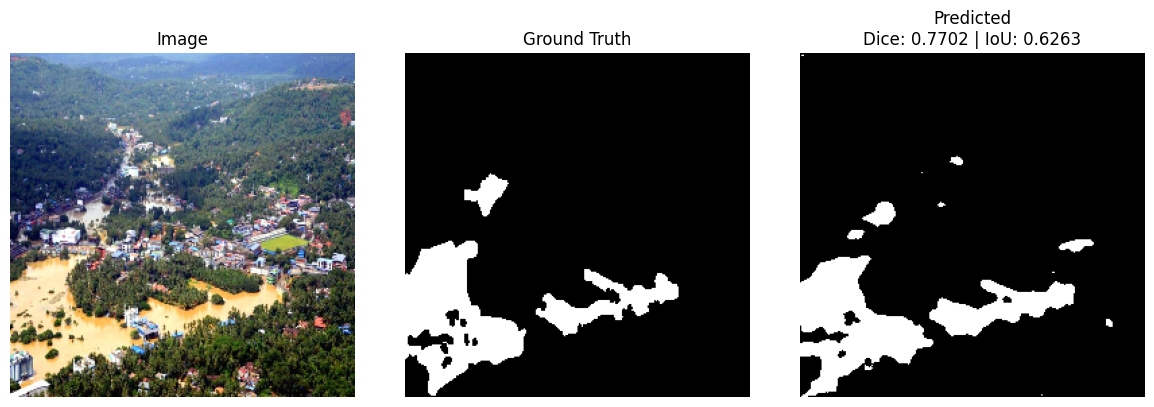

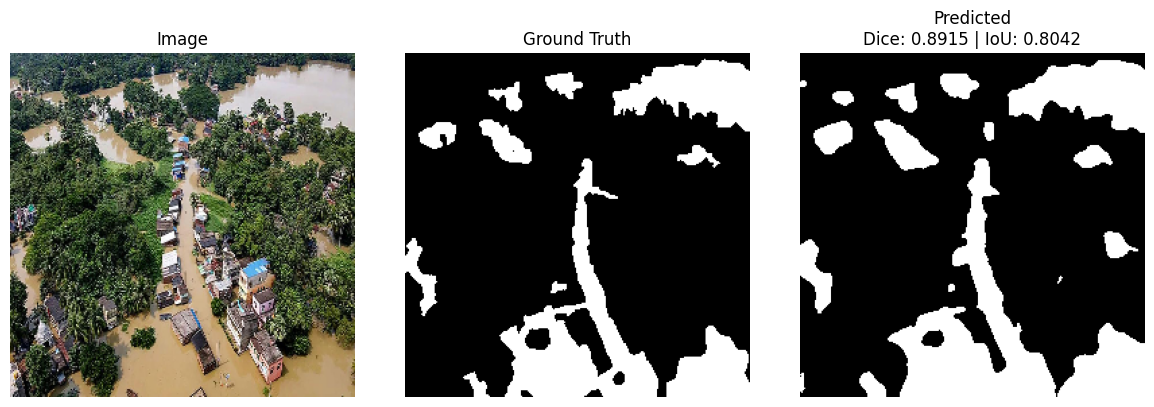

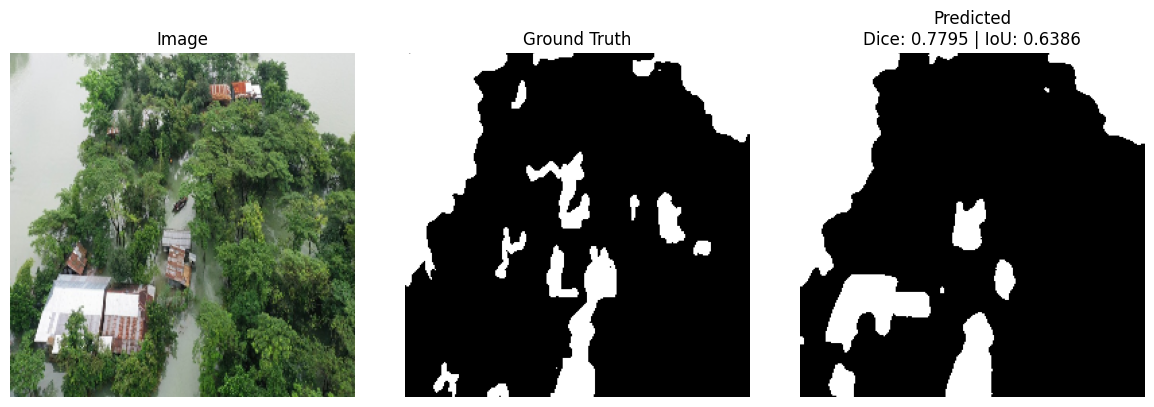

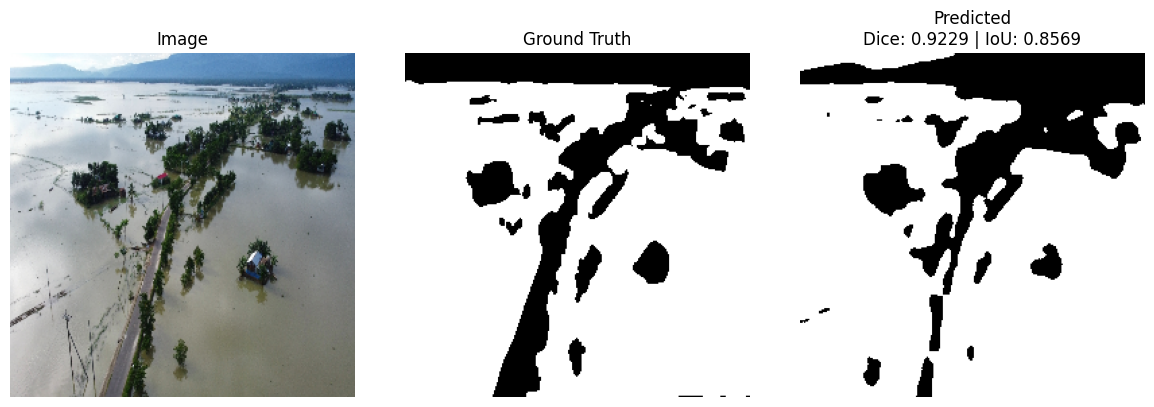

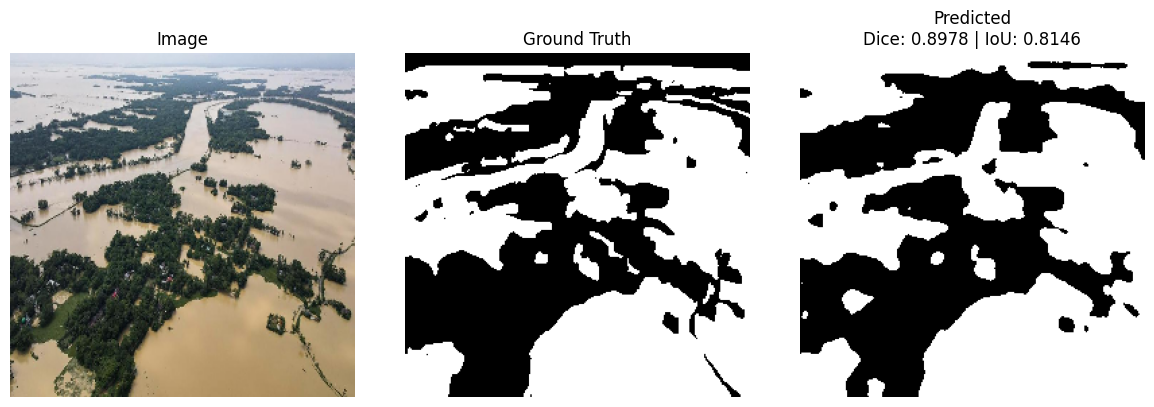

In [ ]:
# Evaluate on test set
test_loss, test_dice, test_iou = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Dice Coef: {test_dice:.4f}")
print(f"Test IoU: {test_iou:.4f}")

# Show predictions on test set
test_sample = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(8)
show_predictions(model, test_sample, num=5)

Based on the test set evaluation results:

*   **Test Loss: 0.2310** - This indicates the average value of the Dice loss function on the test set. A lower loss value is better.
*   **Test Dice Coef: 0.7690** - The Dice Coefficient, also known as the F1 score for segmentation, measures the similarity between the predicted masks and the ground truth masks. A value of 0.7690 suggests a good level of overlap and performance in segmenting the flood areas on unseen data.
*   **Test IoU: 0.6247** - The Intersection over Union (IoU) metric also quantifies the overlap between predicted and true masks. An IoU of 0.6247 is generally considered a reasonably good score for semantic segmentation tasks.

In summary, the model demonstrates solid performance on the test set with a relatively low loss and good Dice Coefficient and IoU scores, indicating it generalizes well to unseen flood area segmentation examples.

#### Metrics Evaluations

In [67]:
evaluation = model.evaluate(X_test, y_test, return_dict=True)

print("\nModel Evaluation Metrics:")
for metric, value in evaluation.items():
  print(f"{metric}: {value:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 47s 47s/step - dice_coef: 0.4703 - iou: 0.3075 - loss: 0.5297

Model Evaluation Metrics:
dice_coef: 0.4703
iou: 0.3075
loss: 0.5297


Based on the model evaluation metrics:

*   **dice_coef: 0.4703**: This metric from the training/validation history indicates the Dice Coefficient performance during the training phases. A value of 0.4703 suggests that during the training and validation process, the model achieved a moderate level of overlap between the predicted and true masks.
*   **iou: 0.3075**: This metric from the training/validation history represents the Intersection over Union performance during training. An IoU of 0.3075 also suggests a moderate level of overlap during the training process.
*   **loss: 0.5297**: This is the loss value recorded during the training/validation history. A loss of 0.5297 indicates the value of the Dice loss function during the training and validation phases.

**Regarding the evaluation on the test set**:

*   **Test Loss: 0.2310**: The final loss of the model on the unseen test data is 0.2310. This lower loss compared to the training/validation loss metrics suggests the model has learned effectively and is generalizing well to new data.
*   **Test Dice Coef: 0.7690**: The Dice Coefficient on the test set is 0.7690. This is a good score, indicating strong performance in segmenting the flood areas on independent data.
*   **Test IoU: 0.6247**: The Intersection over Union on the test set is 0.6247. This is a respectable score for semantic segmentation and aligns with the good Dice Coefficient, confirming the model's effectiveness on the test data.

In summary, the evaluation metrics from the training history (dice\_coef: 0.4703, iou: 0.3075, loss: 0.5297) reflect the model's performance *during* training. The metrics from the evaluation on the test set (Test Loss: 0.2310, Test Dice Coef: 0.7690, Test IoU: 0.6247) provide a more reliable indication of how well the trained model performs on completely unseen data, showing significantly better results compared to the training/validation phase metrics.

# Summary
This project, titled "Flood Area Semantic Segmentation Using a Custom CNN Architecture from Scratch for Climate Resilience," focuses on building and training a custom Convolutional Neural Network (CNN) model for identifying flood-prone areas in images. The project follows a standard machine learning workflow, starting with data loading and extensive exploratory data analysis (EDA), followed by preprocessing, model building, training, and evaluation.

The dataset used consists of 290 paired image-mask samples downloaded from Kaggle Hub. The EDA revealed several key characteristics of the data: the masks are binary (0 for non-flood, 255 for flood), there's a consistent image and mask size of 600x442 pixels, and a moderate class imbalance exists with flood pixels making up about 45.56% and non-flood pixels 54.44%. The analysis also showed variations in image brightness and aspect ratios, and confirmed the absence of blank masks or corrupted files.

Preprocessing steps included resizing all images and masks to a uniform 256x256 resolution, normalizing image pixel values to the [0, 1] range, and binarizing mask values to 0 or 1. The dataset was then split into training (202 samples), validation (58 samples), and test (29 samples) sets.

For training, a custom U-Net architecture was implemented from scratch. This model is designed for semantic segmentation, featuring an encoder-decoder structure with skip connections to preserve spatial information. Custom metrics, Dice coefficient and Intersection over Union (IoU), were defined to evaluate the segmentation performance, and the Dice loss function was used for training to address the class imbalance. Data augmentation, including geometric and photometric transformations, was applied on the fly using a custom generator with the Albumentations library to increase the diversity of the training data and improve model robustness.

The model was trained for 20 epochs with callbacks for early stopping (to prevent overfitting), model checkpointing (to save the best performing model based on validation loss), and learning rate reduction. The trained model was saved in Keras format both locally and to Google Drive.

Finally, the model's performance was evaluated on the unseen test set. The training history plots showed the progression of loss, Dice coefficient, and IoU during training and validation. The evaluation on the test set yielded a Test Loss of 0.2310, a Test Dice Coefficient of 0.7690, and a Test IoU of 0.6247. These metrics indicate that the trained U-Net model successfully learned to segment flood areas and generalizes well to new images, demonstrating solid performance for the climate resilience application. Visual predictions on test samples further illustrated the model's ability to accurately delineate flooded regions.